# Tweepy Stream Example

In this example we use the twitter api and tweepy to collect tweets based on a hash tag, cleans the text data, and organizes the data into a data frame with labels.

## Install Modules  
Note you will need to use tweepy v 3.7 for this example. Regular Expressions, re, and CountVectorizer are used to text cleaning and vectorization. 

In [1]:
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
#pip install tweepy==3.7
from tweepy import OAuthHandler
import json
from tweepy import Stream
#from tweepy.streaming import StreamListener
import re
from sklearn.feature_extraction.text import CountVectorizer

## Connect to twitter

You need a Twitter Developer Acct and associated access codes to access the Twitter API. See the developer portal at twitter. For this version, you will need a consumer key, consumer secret, access token, and access secret. I store my passcodes in a local text file.

In [2]:
## All 4 keys are in my TwitterCodesFile.txt and are comma sep
filename="C://Users//jerem//Google Drive//Online//iCuse//IST736//IST736repo2//codeShare//profB//TwitterCodesFile.txt"
with open(filename, "r") as FILE:
    keys=[i for line in FILE for i in line.split(',')]
   
#API Key:
consumer_key = keys[0]
#API Secret Key:
consumer_secret =keys[1]
#Access Token:
access_token =keys[2]
#Access Token Secret:
access_secret =keys[3]


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

### Stream Listener

Tweepy has a listener class that allows you to collect "streaming" tweets. To set the parameters for this class, it is best to subclass / extend. See below.

In [3]:
 
class Listener(tweepy.StreamListener):
    print("In Listener...")
    tweet_number=0
    #__init__ runs as soon as an instance of the class is created
    def __init__(self, max_tweets, hfilename, rawfile, TweetsList, LabelsList, nohashname):
        self.max_tweets=max_tweets
        print(self.max_tweets)    
    #on_data() is a function of StreamListener as is on_error and on_status    
    def on_data(self, data):
        self.tweet_number+=1
        #print("In on_data", self.tweet_number)
        try:
            #print("In on_data in try")
            with open(hfilename, 'a') as f:
                with open(rawfile, 'a') as g:
                    tweet=json.loads(data)
                    ## RE: https://realpython.com/python-json/
                    tweet_text=tweet["text"]
                    #print(tweet_text,"\n")
                    TweetsList.append(tweet_text)
                    LabelsList.append(nohashname)
                    #print(TweetsList)
                    f.write(tweet_text) # the text from the tweet
                    json.dump(tweet, g)  #write the raw tweet
        except BaseException:
            #print("NOPE")
            pass
        if self.tweet_number>=self.max_tweets:
            #sys.exit('Limit of '+str(self.max_tweets)+' tweets reached.')
            print("Got ", str(self.max_tweets), "tweets.")
            return False
    #method for on_error()
    def on_error(self, status):
        print("ERROR")#machi
        print(status)   #401 your keys are not working
        if(status==420):
            print("Error ", status, "rate limited")
            return False
#----------------end of class Listener


In Listener...


# Let the fun begin!

We will gather tweets based on 3 different hashtags (which will be used as labels for classification purposes / analyses)

In [4]:
label1 = 'cat'
label2='dog'

Hashes = [label1, label2]    
numtweets= 50  ## you can change this number!
CompleteTweetList=[]
CompleteLabelsList=[]


for hashname in Hashes:  
   
    ##########################################################
    ## The commented out lines can be integrated if you want
    ## the USER to enter the hashname and the number of tweets
    ## to get:
    #hashname=input("Enter the hash name, such as #womensrights: ")
    #numtweets=eval(input("How many tweets do you want to get?: "))
   
    # if(hashname[0]=="#"):
    #     nohashname=hashname[1:] #remove the hash
    # else:
    #     nohashname=hashname
    #     hashname="#"+hashname
    ##############################################################
   
    print("getting....", hashname,"\n")
   
    nohashname=hashname
    hashname="#"+hashname
    #Create a file for any hash name    
    hfilename="file_"+nohashname+".txt"
    ## FOr example, file_football.txt  if you used #football
    rawfile="file_rawtweets_"+nohashname+".txt"
    ## For example, file_rawtweets_football.txt
    ## Notice that the raw file is in json
    ## The hfilename is just text
    TweetsList=[]
    LabelsList=[]
   
    ################ Get the tweets..................................
    twitter_stream = Stream(auth, Listener(numtweets,
                                           hfilename, rawfile,
                                           TweetsList, LabelsList,
                                           nohashname))
    ## https://developer.twitter.com/en/docs/twitter-api/tweets/filtered-stream/introduction
    ## https://developer.twitter.com/en/docs/twitter-api/enterprise/powertrack-api/overview
    #twitter_stream.filter(track=['#womensrights'])
    twitter_stream.filter(track=[hashname], languages=["en"])
    ##..................................................................
   
    ## Save each Tweet in a list
    ## This will create a LIST OF CONTENT
    ## that you can use with CountVectorizer, etc.
   
    print(TweetsList)
    print(LabelsList)
   
    ## Add these to the complete lists
    ## extend (rather than append) will add the elements
    ## one by one to the existing list.
    CompleteTweetList.extend(TweetsList)
    CompleteLabelsList.extend(LabelsList)
   
   

######################## END OF LOOP #############################

getting.... cat 

50
Got  50 tweets.
['RT @sachikoko: 🆘CODE RED🆘RELISTED TBD TUE 11/2/21🆘\n💖TIMID, STRESSED 2YO WHITE &amp; #TABBY KITTY "TAZ"💖\n😿💔DUMPED BY OWNER 4 LITTERBOX ISSUES\n🚨N…', 'RT @WonderfulSpace4: Lovely new month dear friends…🍂🍁🐱\n\n#GoodMorningEveryone 🌸 #November1st 🍁 #HappyNewWeek 🌷 #CoffeeTime ☕️ #AutumnFalls 🍂…', 'RT @manytle: 😺New Drop no.11 at Tungmeng Life Collection\nTungmeng travel Queen Sirikit Botanic Garden,\nChiang Mai, Thailand 🇹🇭\nAvailable on…', 'RT @_dalim44: "𝐂𝐚𝐤𝐞♡𝐉𝐚𝐲𝐁" ,Have a meow day everyone🐈 next painting will be for Odd I won\'t forget😊 @jaybnow_hr \n#JAYB #Def #Jaebeom #GOT7 #…', "she's cute!!! #pet #cat #cute #adorable #cute #kitten #petfinder I'm looking for a home!😿🙀😿 https://t.co/k2Qnfqxzls https://t.co/bdtAUDmUm2", '🆘🆘🆘🙏🙏🙏PLEASE HELP SAVE🙏🙏🙏🆘🆘🆘', 'RT @Dizzle_tan: Commission for anonymous of felica, thanks for the support. ❤️\n\n#Darkstalkers #oppai #Nsfw #digitalartwork #Capcom #Felicia…', "'That's What I'm Tacoin' About!' Premium T-Shirt h

## Raw Data Acquired!
Lets see what we collected!!

In [5]:
print(CompleteTweetList)
print(CompleteLabelsList)

['RT @sachikoko: 🆘CODE RED🆘RELISTED TBD TUE 11/2/21🆘\n💖TIMID, STRESSED 2YO WHITE &amp; #TABBY KITTY "TAZ"💖\n😿💔DUMPED BY OWNER 4 LITTERBOX ISSUES\n🚨N…', 'RT @WonderfulSpace4: Lovely new month dear friends…🍂🍁🐱\n\n#GoodMorningEveryone 🌸 #November1st 🍁 #HappyNewWeek 🌷 #CoffeeTime ☕️ #AutumnFalls 🍂…', 'RT @manytle: 😺New Drop no.11 at Tungmeng Life Collection\nTungmeng travel Queen Sirikit Botanic Garden,\nChiang Mai, Thailand 🇹🇭\nAvailable on…', 'RT @_dalim44: "𝐂𝐚𝐤𝐞♡𝐉𝐚𝐲𝐁" ,Have a meow day everyone🐈 next painting will be for Odd I won\'t forget😊 @jaybnow_hr \n#JAYB #Def #Jaebeom #GOT7 #…', "she's cute!!! #pet #cat #cute #adorable #cute #kitten #petfinder I'm looking for a home!😿🙀😿 https://t.co/k2Qnfqxzls https://t.co/bdtAUDmUm2", '🆘🆘🆘🙏🙏🙏PLEASE HELP SAVE🙏🙏🙏🆘🆘🆘', 'RT @Dizzle_tan: Commission for anonymous of felica, thanks for the support. ❤️\n\n#Darkstalkers #oppai #Nsfw #digitalartwork #Capcom #Felicia…', "'That's What I'm Tacoin' About!' Premium T-Shirt https://t.co/MmEmD11ASl  #cute #taco #

# Basic EDA: WordCloud

Build a wordcloud for each class and identify high frequency distinguishing words. 

['RT @sachikoko: 🆘CODE RED🆘RELISTED TBD TUE 11/2/21🆘\n💖TIMID, STRESSED 2YO WHITE &amp; #TABBY KITTY "TAZ"💖\n😿💔DUMPED BY OWNER 4 LITTERBOX ISSUES\n🚨N…', 'RT @WonderfulSpace4: Lovely new month dear friends…🍂🍁🐱\n\n#GoodMorningEveryone 🌸 #November1st 🍁 #HappyNewWeek 🌷 #CoffeeTime ☕️ #AutumnFalls 🍂…', 'RT @manytle: 😺New Drop no.11 at Tungmeng Life Collection\nTungmeng travel Queen Sirikit Botanic Garden,\nChiang Mai, Thailand 🇹🇭\nAvailable on…', 'RT @_dalim44: "𝐂𝐚𝐤𝐞♡𝐉𝐚𝐲𝐁" ,Have a meow day everyone🐈 next painting will be for Odd I won\'t forget😊 @jaybnow_hr \n#JAYB #Def #Jaebeom #GOT7 #…', "she's cute!!! #pet #cat #cute #adorable #cute #kitten #petfinder I'm looking for a home!😿🙀😿 https://t.co/k2Qnfqxzls https://t.co/bdtAUDmUm2", '🆘🆘🆘🙏🙏🙏PLEASE HELP SAVE🙏🙏🙏🆘🆘🆘', 'RT @Dizzle_tan: Commission for anonymous of felica, thanks for the support. ❤️\n\n#Darkstalkers #oppai #Nsfw #digitalartwork #Capcom #Felicia…', "'That's What I'm Tacoin' About!' Premium T-Shirt https://t.co/MmEmD11ASl  #cute #taco #

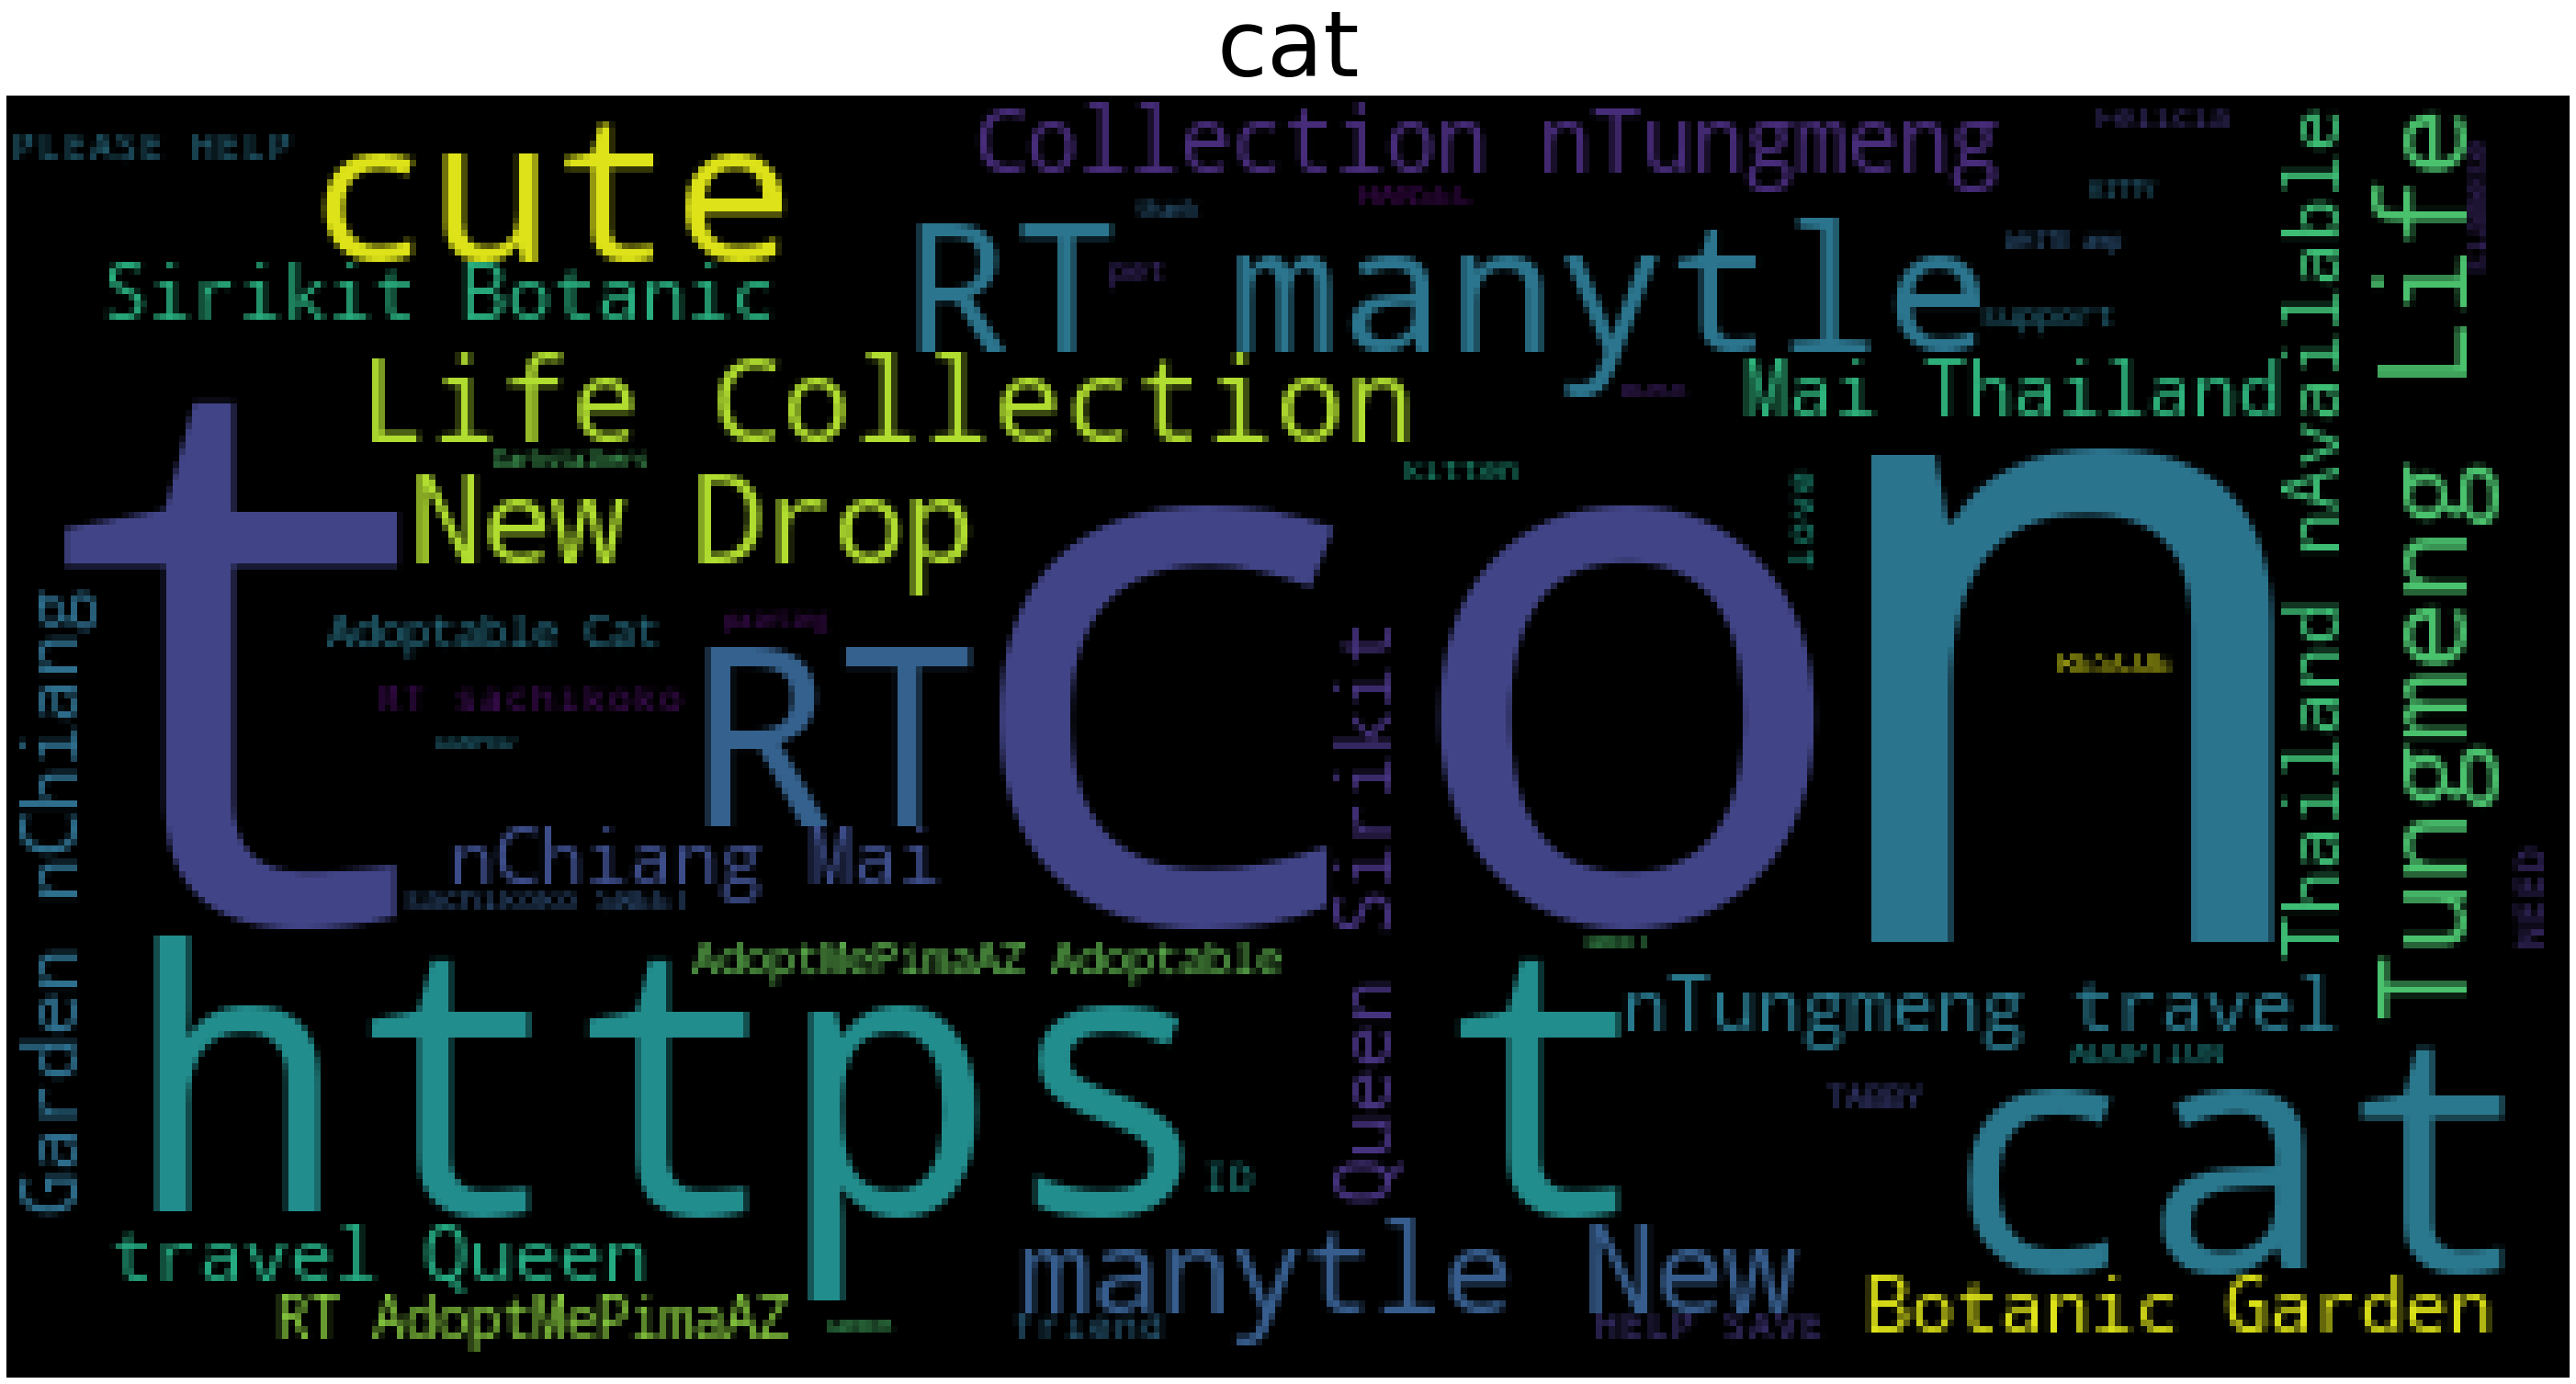

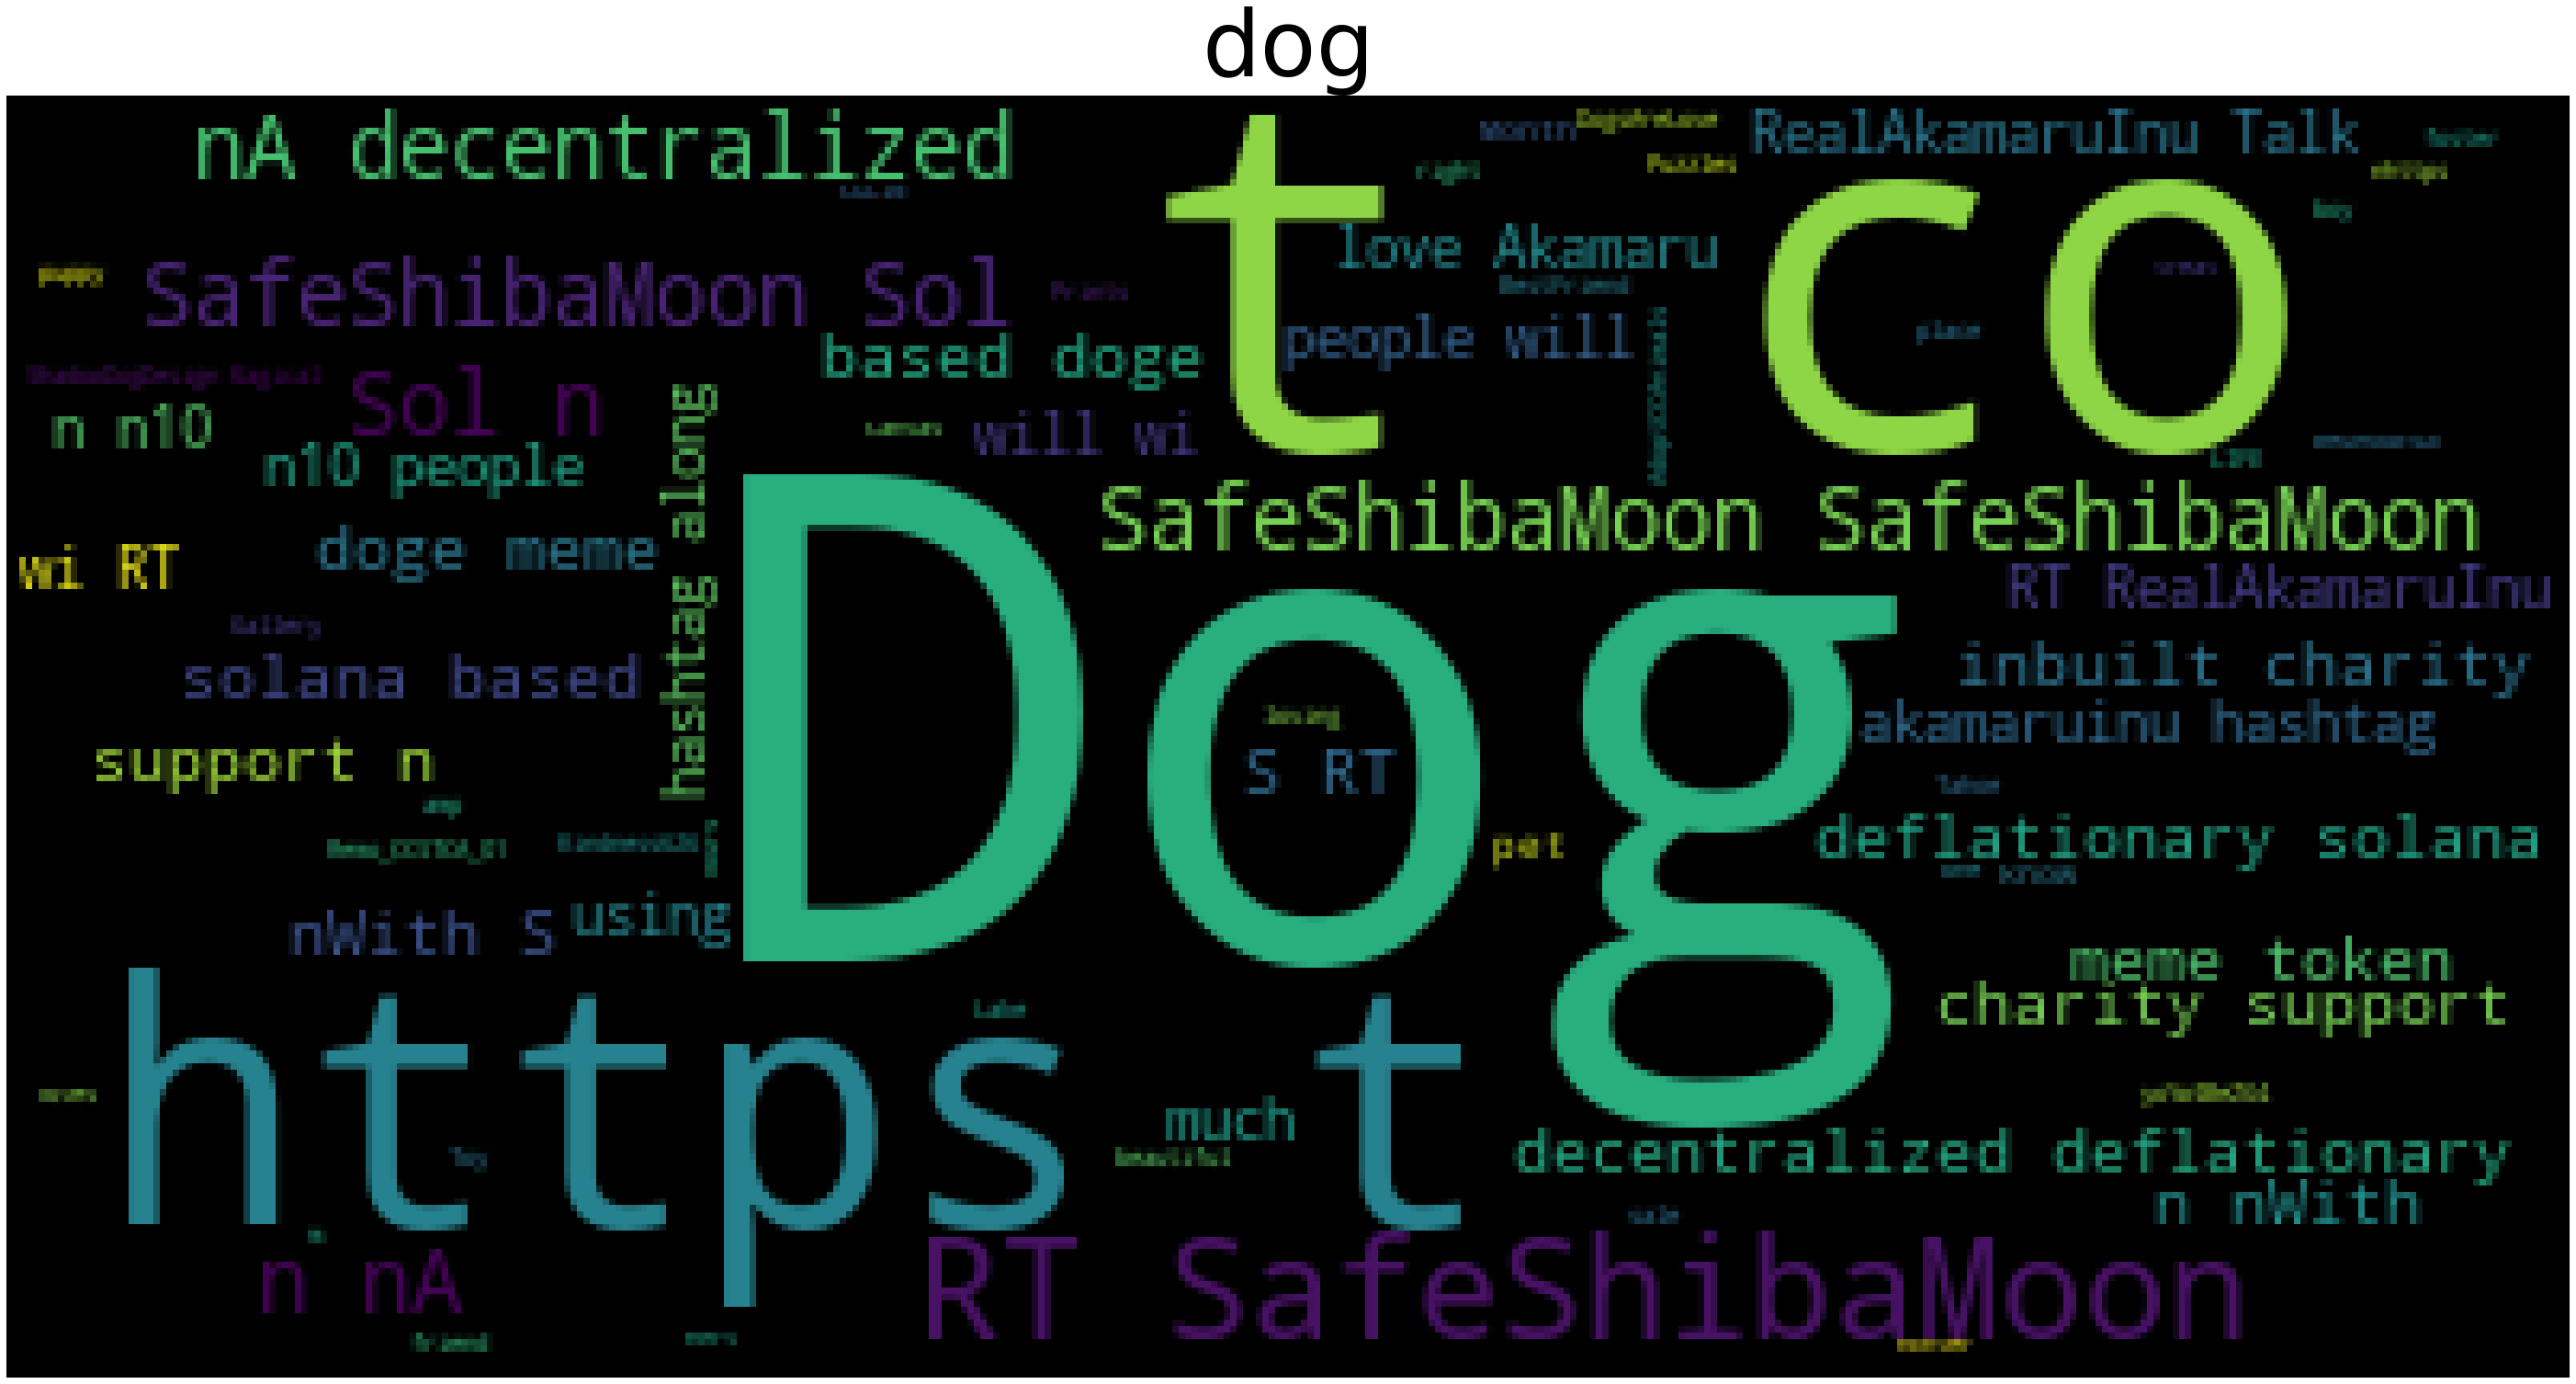

In [6]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS


ind1 = (pd.DataFrame(CompleteLabelsList) == label1)[0].values.tolist()
ind2 = (pd.DataFrame(CompleteLabelsList) == label2)[0].values.tolist()
#print(ind1)
slice1 = list(filter(lambda i: ind1[i], range(len(ind1))))
slice2 = list(filter(lambda i: ind2[i], range(len(ind2))))

text1 = [CompleteTweetList[i] for i in slice1]
text2 = [CompleteTweetList[i] for i in slice2]

print(text1)

wordcloud = WordCloud().generate(str(text1))
# Open a plot of the generated image.
#figure(figsize = (20,2))
plt.figure(figsize=(50,40))
plt.imshow(wordcloud)
           #, aspect="auto")
plt.title(label1,fontsize=100)
plt.axis("off")
plt.show()



wordcloud = WordCloud().generate(str(text2))
# Open a plot of the generated image.
#figure(figsize = (20,2))
plt.figure(figsize=(50,40))
plt.imshow(wordcloud)
           #, aspect="auto")
plt.title(label2, fontsize=100)
plt.axis("off")
plt.show()


## Clean and Tidy the Data

### Intermediate File Save

The next goal is to create a csv file where the first column is the label
which is the hashtag and the second column is the entire tweet WITH NO newlines, etc.

In [7]:
TW_file="TweetCSV2.csv"
FILE=open(TW_file, "w")
WhatToWrite="LABEL,Tweet\n"
FILE.write(WhatToWrite)
FILE.close()

## This fun python trick allows you to loop
## through two lists at once and together
ZIP_List = zip(CompleteTweetList, CompleteLabelsList)

with open(TW_file, "a") as f:
    for TW, Lab in ZIP_List:
        TW=TW.replace("\n", " ")
        TW=TW.replace(",", " ")
        TW=re.sub(r"[^A-Za-z\-]", " ", TW)
        TW=re.sub(r"\bhttp\b | \bhttps\b", " ", TW)
        ## Why do we need to do this?
        #print("NEXT\n")
        print(TW)
        print(Lab)
        WhatToWrite=str(Lab+","+TW+"\n")
        f.write(WhatToWrite)
   

RT  sachikoko   CODE RED RELISTED TBD TUE           TIMID  STRESSED  YO WHITE  amp   TABBY KITTY  TAZ     DUMPED BY OWNER   LITTERBOX ISSUES  N 
cat
RT  WonderfulSpace   Lovely new month dear friends       GoodMorningEveryone    November st    HappyNewWeek    CoffeeTime     AutumnFalls   
cat
RT  manytle   New Drop no    at Tungmeng Life Collection Tungmeng travel Queen Sirikit Botanic Garden  Chiang Mai  Thailand    Available on 
cat
RT   dalim                 Have a meow day everyone  next painting will be for Odd I won t forget   jaybnow hr   JAYB  Def  Jaebeom  GOT    
cat
she s cute     pet  cat  cute  adorable  cute  kitten  petfinder I m looking for a home        t co k Qnfqxzls    t co bdtAUDmUm 
cat
      PLEASE HELP SAVE      
cat
RT  Dizzle tan  Commission for anonymous of felica  thanks for the support       Darkstalkers  oppai  Nsfw  digitalartwork  Capcom  Felicia 
cat
 That s What I m Tacoin  About   Premium T-Shirt    t co MmEmD  ASl   cute  taco  funny  food  tacos  ta

### Clean, Stem, and Vectorize

Using CountVectorizer, the data is cleaned, stopwords and 'garbage' are removed, and the data is vectorized. The result is a document term matrix.


In [8]:
import nltk
nltk.download('wordnet')
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]


MyCV_T=CountVectorizer(input='content',
                        stop_words='english',
                        ngram_range=(1,1),
                        tokenizer=LemmaTokenizer(),
                        max_features=100
                        )


### READ our csv file of tweets into two lists
## The first is the label, second the tweet

FileContents=pd.read_csv(TW_file)
print(FileContents["LABEL"])
print(FileContents["Tweet"])

## CONVERT the tweets to a LIST so we can use
## CountVectorizer
TweetsList = FileContents["Tweet"].to_list()
print(TweetsList)

LABEL_List = FileContents["LABEL"].to_list()
print(LABEL_List)

My_DTM_T=MyCV_T.fit_transform(TweetsList)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0     cat
1     cat
2     cat
3     cat
4     cat
     ... 
95    dog
96    dog
97    dog
98    dog
99    dog
Name: LABEL, Length: 100, dtype: object
0     RT  sachikoko   CODE RED RELISTED TBD TUE     ...
1     RT  WonderfulSpace   Lovely new month dear fri...
2     RT  manytle   New Drop no    at Tungmeng Life ...
3     RT   dalim                 Have a meow day eve...
4     she s cute     pet  cat  cute  adorable  cute ...
                            ...                        
95    RT  AdoptMePimaAZ  Adoptable  Dog  Rio PIMAAZ ...
96    RT  cookiedakota  Angels of the Planet       p...
97    RT  SafeShibaMoon   SafeShibaMoon  Sol  A dece...
98    Very Classic Dog Rope Toy   Hot selling more t...
99    Hey  Hudson  the August Dog Star of the Month ...
Name: Tweet, Length: 100, dtype: object
['RT  sachikoko   CODE RED RELISTED TBD TUE           TIMID  STRESSED  YO WHITE  amp   TABBY KITTY  TAZ     DUMPED BY OWNER   LITTERBOX ISSUES  N ', 'RT  WonderfulSpace   Lovely new month dear f

C:\Users\jerem\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


### Reformating and Tidying the Data

We convert the DTM to a Dataframe and add labels!

In [9]:
## First - use your CountVectorizer to get all the column names
ColNames=MyCV_T.get_feature_names()
print("The vocab is: ", ColNames, "\n\n")

## NEXT - Use pandas to create data frames
My_DF_T=pd.DataFrame(My_DTM_T.toarray(),columns=ColNames)



The vocab is:  ['-', 'adoptable', 'adoption', 'adoptmepimaaz', 'akamaru', 'akamaruinu', 'amp', 'art', 'asap', 'available', 'b', 'based', 'beua', 'black', 'botanic', 'cat', 'charity', 'chiang', 'collection', 'cute', 'darkstalkers', 'decentralized', 'deflationary', 'dog', 'doge', 'drop', 'dumped', 'enter', 'felicia', 'friend', 'gallery', 'garden', 'gretel', 'hansel', 'hashtag', 'hashtags', 'help', 'home', 'id', 'inbuilt', 'j', 'kitten', 'kitty', 'know', 'life', 'love', 'lunch', 'm', 'magical', 'mai', 'manytle', 'meme', 'metal', 'mo', 'month', 'need', 'new', 'november', 'ow', 'owner', 'painting', 'people', 'pet', 'pimaaz', 'queen', 'realakamaruinu', 'rescue', 'rt', 's', 'sachikoko', 'safeshibamoon', 'sale', 'save', 'siamese', 'sirikit', 'sol', 'solana', 'st', 'support', 'sweet', 't', 'tabby', 'tag', 'tahoe', 'talk', 'thailand', 'token', 'tour', 'travel', 'tungmeng', 'usa', 'using', 'vintage', 'w', 'white', 'wi', 'x', 'y', 'year', 'yo'] 




### Inspect and further cleaning 

Twitter data is notorously messy. So lets inspect and further clean. Lets remove numeric digits, links and more. Use Regular Expressions to identify word classes to be removed (EG Links)
.

In [10]:
## Let's look!
print(My_DF_T)
print(LABEL_List)



    -  adoptable  adoption  adoptmepimaaz  akamaru  akamaruinu  amp  art  \
0   0          0         0              0        0           0    1    0   
1   0          0         0              0        0           0    0    0   
2   0          0         0              0        0           0    0    0   
3   0          0         0              0        0           0    0    0   
4   0          0         0              0        0           0    0    0   
.. ..        ...       ...            ...      ...         ...  ...  ...   
95  0          1         0              1        0           0    0    0   
96  0          0         0              0        0           0    0    0   
97  0          0         0              0        0           0    0    0   
98  0          0         0              0        0           0    0    0   
99  0          0         0              0        0           0    0    0   

    asap  available  ...  usa  using  vintage  w  white  wi  x  y  year  yo  
0      0 

In [11]:
## Some clean-up
droplist2 = [i for i in My_DF_T.columns if re.search(r'[^A-Za-z\-]', i)]
print(droplist2)    



[]


In [12]:
My_DF_T.drop(droplist2,axis=1,inplace=True)
print(My_DF_T)



    -  adoptable  adoption  adoptmepimaaz  akamaru  akamaruinu  amp  art  \
0   0          0         0              0        0           0    1    0   
1   0          0         0              0        0           0    0    0   
2   0          0         0              0        0           0    0    0   
3   0          0         0              0        0           0    0    0   
4   0          0         0              0        0           0    0    0   
.. ..        ...       ...            ...      ...         ...  ...  ...   
95  0          1         0              1        0           0    0    0   
96  0          0         0              0        0           0    0    0   
97  0          0         0              0        0           0    0    0   
98  0          0         0              0        0           0    0    0   
99  0          0         0              0        0           0    0    0   

    asap  available  ...  usa  using  vintage  w  white  wi  x  y  year  yo  
0      0 

In [13]:
## Note: The \bWORD\b matches the exact WORD
droplist3 = [i for i in My_DF_T.columns
             if re.search(r'\bhttp\b | \bhttps\b | \brt\b', i)]
print(droplist3)  
   
My_DF_T.drop(droplist3,axis=1,inplace=True)


print(My_DF_T)

[]
    -  adoptable  adoption  adoptmepimaaz  akamaru  akamaruinu  amp  art  \
0   0          0         0              0        0           0    1    0   
1   0          0         0              0        0           0    0    0   
2   0          0         0              0        0           0    0    0   
3   0          0         0              0        0           0    0    0   
4   0          0         0              0        0           0    0    0   
.. ..        ...       ...            ...      ...         ...  ...  ...   
95  0          1         0              1        0           0    0    0   
96  0          0         0              0        0           0    0    0   
97  0          0         0              0        0           0    0    0   
98  0          0         0              0        0           0    0    0   
99  0          0         0              0        0           0    0    0   

    asap  available  ...  usa  using  vintage  w  white  wi  x  y  year  yo  
0     

## Classification: Simple Example with MNB

In [14]:
My_DF_T['label'] = LABEL_List


class1_DF = My_DF_T[(My_DF_T["label"] == label1)]
class2_DF = My_DF_T[(My_DF_T["label"] == label2)]

In [15]:



## Create the testing set - grab a sample from the training set. 
## Be careful. Notice that right now, our train set is sorted by label.
## If your train set is large enough, you can take a random sample.
from sklearn.model_selection import train_test_split

class1_train, class1_test = train_test_split(class1_DF, test_size=0.3)
class2_train, class2_test = train_test_split(class2_DF, test_size=0.3)

TrainDF = pd.concat([class1_train, class2_train])
TestDF = pd.concat([class1_test, class2_test])


trainLabels = TrainDF['label']
testLabels = TestDF['label']

TrainDF.drop(labels='label',axis=1,inplace=True)
TestDF.drop(labels='label',axis=1,inplace=True)

print(TrainDF)

    -  adoptable  adoption  adoptmepimaaz  akamaru  akamaruinu  amp  art  \
18  0          0         0              0        0           0    0    0   
7   0          0         0              0        0           0    0    0   
43  0          1         0              1        0           0    0    0   
27  0          0         0              0        0           0    0    0   
42  0          1         0              1        0           0    0    0   
.. ..        ...       ...            ...      ...         ...  ...  ...   
66  0          0         0              0        1           1    0    0   
95  0          1         0              1        0           0    0    0   
77  0          0         0              0        1           1    0    0   
58  0          0         0              0        0           0    0    0   
79  0          0         0              0        1           1    0    0   

    asap  available  ...  usa  using  vintage  w  white  wi  x  y  year  yo  
18     0 

In [16]:
####################################################################
########   Predict Using  Naive Bayes ############################
####################################################################
from sklearn.naive_bayes import MultinomialNB
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit


MyModelNB= MultinomialNB()
MyModelNB.fit(TrainDF, trainLabels)
Prediction = MyModelNB.predict(TestDF)
print("The prediction from NB is:")
print(Prediction)
print("The actual labels are:")
print(testLabels)

The prediction from NB is:
['cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'dog' 'dog' 'dog'
 'cat' 'dog' 'dog' 'dog' 'dog' 'dog']
The actual labels are:
32    cat
16    cat
33    cat
0     cat
17    cat
37    cat
22    cat
11    cat
20    cat
5     cat
39    cat
24    cat
47    cat
10    cat
1     cat
88    dog
69    dog
50    dog
60    dog
53    dog
97    dog
75    dog
98    dog
56    dog
57    dog
52    dog
65    dog
61    dog
94    dog
70    dog
Name: label, dtype: object


C:\Users\jerem\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['cat', 'dog'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[15  0]
 [ 2 13]]


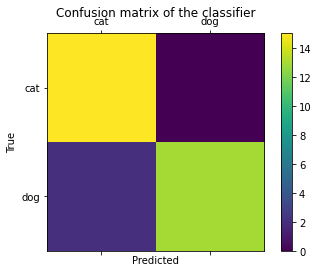

In [17]:
## How Accurate was the Model ... confusion matrix
from sklearn.metrics import confusion_matrix
## The confusion matrix is square and is labels X labels
## We ahve two labels, so ours will be 2X2
#The matrix shows
## rows are the true labels
## columns are predicted
## it is al[habetical
## The numbers are how many 
## actual = (TestLabels == 'neg').tolist()
## predict = (Prediction == 'neg').tolist()
y_true = testLabels
y_predict = (Prediction).tolist()
labels =[label1, label2]
cm = confusion_matrix(y_true, y_predict, labels)
print(cm)
### prediction probabilities
## columns are the labels in alphabetical order
## The decinal in the matrix are the prob of being
## that label
#print(np.round(MyModelNB.predict_proba(TestDF),2))
#import matplotlib as plt
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()